## Connect to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Set all the directories

The path are set according to the folders under the Google Drive. Hence, DO NOT change the path only if the path is changed accrodingly.  

In [4]:
HOME_DIR = "/content/drive/MyDrive/data/train/"

#Folder path for Images
IMG_DIR = "/content/drive/MyDrive/data/train/img/"

#Folder path for Labels
MSK_DIR = "/content/drive/MyDrive/data/train/msk/"

#Folder path for sub-images
SUB_DIR = "/content/drive/MyDrive/data/train/sub_img/"

## Import Libraries and Modules

In [5]:
# install imagecodecs for decode tif images
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 16.1 MB/s eta 0:00:00


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import json
import imageio.v2 as imageio
from IPython.display import Image
import os
import imagecodecs
import glob
import matplotlib.pyplot as plt
import h5py
import skimage

import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



## Check Files consistency,  Check if Image and Labels is Aligned. (Important)

In [7]:
IMG_list = os.listdir(IMG_DIR)
MSK_list = os.listdir(MSK_DIR)
IMG_list = sorted(IMG_list)
MSK_list = sorted(MSK_list)

print(f"{len(IMG_list)} Images are found, and {len(MSK_list)} Labels are found")

if len(IMG_list) == len(MSK_list):
    for i in range(len(IMG_list)):
        #print(f"Image file name:{IMG_list[i]}, Label file name:{MSK_list[i]}")
        str1 = IMG_list[i].split(".")[0]
        str2 = MSK_list[i].split(".")[0]
        index = str2.find(str1)
        if index != -1: # if {str2}" contains "{str1}
            continue
        else:
            print(f"Image file name:{IMG_list[i]}, Label file name:{MSK_list[i]}")
            print(f"Image:{str1} and Label:{str2} are not aligned!!! Check the file naming!!! ")
    print("All the files are checked. Proceed to the next block")
else:
    print(f"The numbers of Images and Labels are not matched!!!")



44 Images are found, and 44 Labels are found
All the files are checked. Proceed to the next block


## Check Files Shape and Size eligible.

In [8]:
# Read the file and Check if the image and label shape is 1024 x 1024
for i in range(len(IMG_list)):
    img=np.array(imageio.imread(IMG_DIR+IMG_list[i]))
    msk=np.array(imageio.imread(MSK_DIR+MSK_list[i]))
    print(f"Sequence #{i+1} image: {IMG_list[i]}, label: {MSK_list[i]}")
    if img.shape != (1024, 1024) and img.shape != (1024, 1024, 3) :
      print(f"image file: {IMG_list[i]} shape size {img.shape} is ineligible.")
    if msk.shape != (1024,1024) :
      print(f"image file: {MSK_list[i]} shape size {msk.shape} is ineligible.")

Sequence #1 image: E1-60000X-1.tif, label: Label_E1-60000X-1.png
Sequence #2 image: E1-60000X-10.tif, label: Label_E1-60000X-10.png
Sequence #3 image: E1-60000X-11.tif, label: Label_E1-60000X-11.png
Sequence #4 image: E1-60000X-12.tif, label: Label_E1-60000X-12.png
Sequence #5 image: E1-60000X-13.tif, label: Label_E1-60000X-13.png
Sequence #6 image: E1-60000X-14.tif, label: Label_E1-60000X-14.png
Sequence #7 image: E1-60000X-15.tif, label: Label_E1-60000X-15.png
Sequence #8 image: E1-60000X-16.tif, label: Label_E1-60000X-16.png
Sequence #9 image: E1-60000X-17.tif, label: Label_E1-60000X-17.png
Sequence #10 image: E1-60000X-18.tif, label: Label_E1-60000X-18.png
Sequence #11 image: E1-60000X-19.tif, label: Label_E1-60000X-19.png
Sequence #12 image: E1-60000X-2.tif, label: Label_E1-60000X-2.png
Sequence #13 image: E1-60000X-3.tif, label: Label_E1-60000X-3.png
Sequence #14 image: E1-60000X-37.tif, label: Label_E1-60000X-37.png
Sequence #15 image: E1-60000X-38.tif, label: Label_E1-60000X-38

## Preview the image and label

In [11]:
# Choose the image number to preview

i = int(input(f"Choose the image sequence to preview, enter a number between 1 and {len(IMG_list)}: "))

# 20 has noise
# 44 is fine

Choose the image sequence to preview, enter a number between 1 and 44: 44


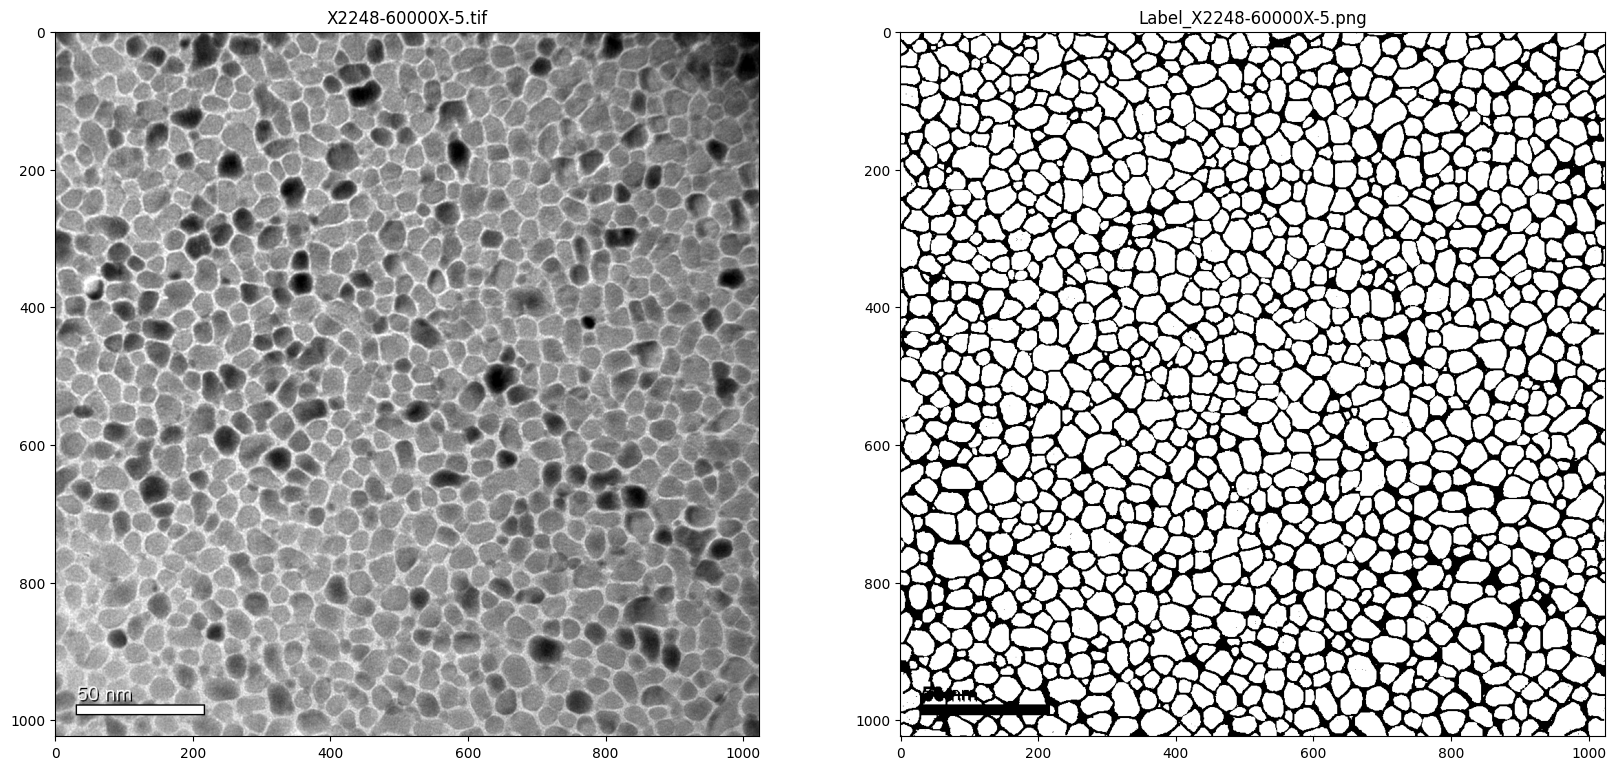

In [12]:
## Load and preview the Image and label

image_file = IMG_list[i-1]
label_file = MSK_list[i-1]
img=np.array(imageio.imread(IMG_DIR+IMG_list[i-1]))
msk=np.array(imageio.imread(MSK_DIR+MSK_list[i-1]))


# Create a new figure
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2

# Add subplot 1
fig.add_subplot(rows, columns, 1)
plt.imshow(img, cmap='Greys_r')
plt.title(f"{image_file}")

# Add subplot 2
fig.add_subplot(rows, columns, 2)
plt.imshow(msk, cmap='Greys_r', vmin=0, vmax=1)
plt.title(f"{label_file}")

plt.show()

## Get Equally Sliced Sub-image, Size(256,256)

In [15]:
orig_x = 1024
orig_y = 1024

step_x = 128
step_y = 128

output_x = 256
output_y = 256
num_classes = 2

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

for i in range(0, len(IMG_list)):
    filename = IMG_list[i]
    #print(filename)
    img=np.array(imageio.imread(IMG_DIR + IMG_list[i]))
    if img.shape == (1024,1024,3):
        img = rgb2gray(img)

    msk=np.array(imageio.imread(MSK_DIR + MSK_list[i]))
    img_scale=scaler.fit_transform(img.reshape(-1, 1)).reshape(img.shape)

    print(f"Processing... #{i+1} Image file: {IMG_list[i]}, Label file: {MSK_list[i]}")

    # Initialize features and labels with `None`
    X = None
    Y = None

    for x in range(0, orig_x-output_x+1, step_x):
        for y in range(0, orig_y-output_y+1, step_y):

                start_x = x
                start_y = y

                Y = np.copy(msk[start_x: start_x + output_x,
                                start_y: start_y + output_y])

                X = np.copy(img_scale[start_x: start_x + output_x,
                                start_y: start_y + output_y])

                X = np.expand_dims(X, axis=0)
                Y = np.expand_dims(Y, axis=0)

                file=filename \
                +"_x_"+str(start_x) \
                +"_y_"+str(start_y) \
                +"_"

                destination = os.path.join(SUB_DIR, f"{file}.h5")

                if os.path.exists(destination):
                    # File already exists, pass
                    pass

                else:
                    os.makedirs(os.path.dirname(destination), exist_ok= True)
                    with h5py.File(destination, "w") as f1:
                        dset1 = f1.create_dataset("x", (output_x, output_y), dtype='float32', data=X)
                        dset2 = f1.create_dataset("y", (output_x, output_y), dtype='uint8', data=Y)
                        f1.close()

print(f"Done, the sub-images are saved to {SUB_DIR}")

Processing... #1 Image file: E1-60000X-1.tif, Label file: Label_E1-60000X-1.png
Processing... #2 Image file: E1-60000X-10.tif, Label file: Label_E1-60000X-10.png
Processing... #3 Image file: E1-60000X-11.tif, Label file: Label_E1-60000X-11.png
Processing... #4 Image file: E1-60000X-12.tif, Label file: Label_E1-60000X-12.png
Processing... #5 Image file: E1-60000X-13.tif, Label file: Label_E1-60000X-13.png
Processing... #6 Image file: E1-60000X-14.tif, Label file: Label_E1-60000X-14.png
Processing... #7 Image file: E1-60000X-15.tif, Label file: Label_E1-60000X-15.png
Processing... #8 Image file: E1-60000X-16.tif, Label file: Label_E1-60000X-16.png
Processing... #9 Image file: E1-60000X-17.tif, Label file: Label_E1-60000X-17.png
Processing... #10 Image file: E1-60000X-18.tif, Label file: Label_E1-60000X-18.png
Processing... #11 Image file: E1-60000X-19.tif, Label file: Label_E1-60000X-19.png
Processing... #12 Image file: E1-60000X-2.tif, Label file: Label_E1-60000X-2.png
Processing... #13

## Run the below script to check if sub-image file size is eligible

In [16]:
def check_file_size(directory):
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Check if it's a file
        if os.path.isfile(filepath):
            # Get the file size in bytes
            file_size = os.path.getsize(filepath)
            # Convert bytes to kilobytes
            file_size_kb = file_size / 1024
            if file_size_kb <= 300:
                print(f"File {filename} is smaller than 300kB, is ineligible, need to check!!!")

# Check file Size of the Directory
check_file_size(SUB_DIR)


## Generate and Save the data for Training.

In [18]:
def get_file_names(path):
    files = []
    for filename in os.listdir(path):
        if os.path.isfile(os.path.join(path, filename)):
            files.append(filename)
    return files


train_files = get_file_names(SUB_DIR)
print(f"There are {len(train_files)} sub-image files")

num_channels = 1
num_classes = 1
dim = (256, 256)

train_files = get_file_names(SUB_DIR)

X_series = np.zeros((len(train_files), num_channels, *dim),
             dtype=np.float64) #float64
y_series = np.zeros((len(train_files), num_classes, *dim),
             dtype=np.float64) #float64

for i,ID in enumerate(train_files):
    # Store sample
    #print(ID)
    with h5py.File(SUB_DIR + ID, 'r') as f:
        X_series[i] = np.array(f.get("x"))
        y_series[i] = np.array(f.get("y"))


print(f"Image dataset shape for model training: {X_series.shape} (Number, channel, width(x-axis pixel), height(y-axis pixel)))")
print(f"Label dataset shape for model training: {y_series.shape} (Number, channel, width(x-axis pixel), height(y-axis pixel)))")

# Save X_series and y_series to files
np.save(os.path.join(HOME_DIR, 'X_series.npy'), X_series)
np.save(os.path.join(HOME_DIR, 'y_series.npy'), y_series)

print(f"'X_series.npy' and 'y_series.npy' saved to {HOME_DIR}")

There are 2156 sub-image files for training
Image dataset shape for model training: (2156, 1, 256, 256) (Number, channel, width(x-axis pixel), height(y-axis pixel)))
Label dataset shape for model training: (2156, 1, 256, 256) (Number, channel, width(x-axis pixel), height(y-axis pixel)))
126.55425906181335


### Show all the sub-image filename (optional)

In [ ]:
print('\n'.join(str(train_file) for train_file in train_files))

## Generate a json file as the Model input Config/reference

In [ ]:
def get_file_names(path):
    files = []
    for filename in os.listdir(path):
        if os.path.isfile(os.path.join(path, filename)):
            files.append(filename)
    return files

train_files = get_file_names(SUB_DIR)
print(f"There are {len(train_files)} sub-image files for training")

os.chdir(HOME_DIR)
with open('config.json', 'w') as f:
    json.dump(config, f)
    f.close()

print(f"Generate the config file, check: {HOME_DIR}")

There are 2156 sub-image files for training
Generate the config file, check /content/drive/MyDrive/data/train/
